# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
#loading the csv and making it into pandas dataframe

import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

df = pd.read_csv(url, header=None, 
                       names= ["age", "operation_year", "axillary_nodes", "survival"])

# Noted that orignial df did not have labels, added them in based on UCI 
# attribute information found in text pasted below df head

df.head()

,age,operation_year,axillary_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Attribute Information:**

1.** Age of patient** at time of operation (numerical) 
2. Patient's ** year of operation** (year - 1900, numerical) 
3. **Number of positive axillary nodes** detected (numerical) 
4. **Survival status** (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

In [2]:
# verify appropriate sized of dataset

df.count()

# number of instances should be 306 according to UCI. Looks good.

age               306
operation_year    306
axillary_nodes    306
survival          306
dtype: int64

In [2]:
# UCI says no missing values, but let's verify that:

df.isnull().sum()

# all zeros, looks good. Thank goodness!

age               0
operation_year    0
axillary_nodes    0
survival          0
dtype: int64

In [3]:
# Okay, time to change the survival status column to 1's and 0's

# It looks like I only need to replace 2's with 0's, since survived already = 1

# I'm using df.replace function to find all the 2 and replace the with 0

df['survival'] = df['survival'].replace(to_replace = 2, value = 0)


# Verified change below in head

df['survival'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: survival, dtype: int64

In [4]:
df.head(10)

# I needed more than 5 rows to see the replacements I made

,age,operation_year,axillary_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [0]:
# So far, so good. 11:28am EST.

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [5]:
# Added later. Should have started here...

df.describe()

,age,operation_year,axillary_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


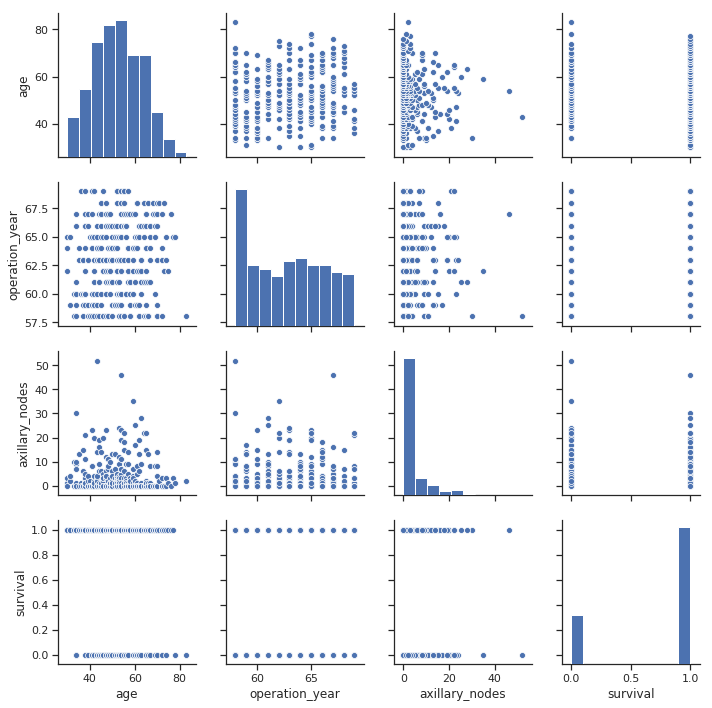

In [0]:
# To start with, I'm going to look at every combination of 2 variables 

import seaborn as sns

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df)

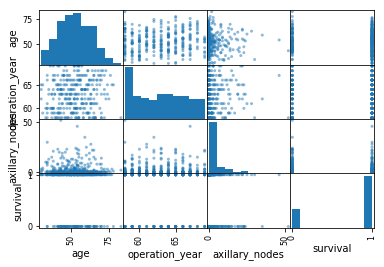

In [6]:
# Added later. Not becuase I needed it, but because I wanted to see the same as solution method.

pd.plotting.scatter_matrix(df);

In [7]:
# Added later... 

# Couple things to learn here: 

#     pd.qcut()  <-- Holy Crap! 

#     I can cut right in the same code as I call the Crosstab 

pd.crosstab(df['survival'],pd.qcut(df['axillary_nodes'], 10, duplicates='drop'))

axillary_nodes,"(-0.001, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 7.0]","(7.0, 13.0]","(13.0, 52.0]"
survival,,,,,,
0,27,5,7,12,15,15
1,150,15,13,21,12,14


In [8]:
# Added Later

df['axillary_nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: axillary_nodes, dtype: int64

In [27]:
# Added Later...

# Thing to Learn: custom sized bins, right=False is way to exclude right side of interval

anode_bins = pd.cut(df['axillary_nodes'], bins=[0,1,3,8,53], right=False)
anode_bins.value_counts()

[0, 1)     136
[1, 3)      61
[8, 53)     56
[3, 8)      53
Name: axillary_nodes, dtype: int64

In [31]:
# Added Later. This the Crosstab that is turned into the main bargraph below

pd.crosstab([anode_bins, age_median], df['survival'])

survival                        0   1
axillary_nodes age                   
[0, 1)         (29.999, 52.0]  12  53
               (52.0, 83.0]     7  64
[1, 3)         (29.999, 52.0]   5  28
               (52.0, 83.0]     8  20
[3, 8)         (29.999, 52.0]   9  22
               (52.0, 83.0]    10  12
[8, 53)        (29.999, 52.0]  13  14
               (52.0, 83.0]    17  12

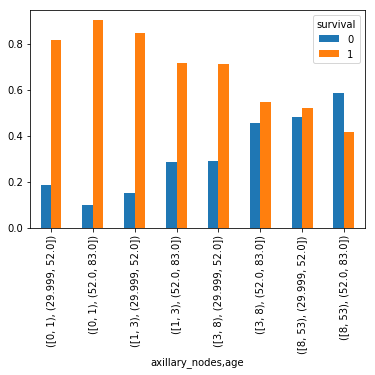

In [29]:
# Added Later

# Thing to Learn: doing this myself I understood the graph better...
# Note -- this represents 4 interval 

age_median = pd.qcut(df['age'],2)

#pd.crosstab([anode_bins, age_median], df['survival'], normalize='index')
pd.crosstab([anode_bins, age_median], df['survival'], normalize='index').plot(kind='bar'); 

In [0]:
age_bins = pd.cut(df['age'], 5)  # 5 equal-sized bins
age_bins.head()


0    (29.947, 40.6]
1    (29.947, 40.6]
2    (29.947, 40.6]
3    (29.947, 40.6]
4    (29.947, 40.6]
Name: age, dtype: category
Categories (5, interval[float64]): [(29.947, 40.6] < (40.6, 51.2] < (51.2, 61.8] < (61.8, 72.4] <
                                    (72.4, 83.0]]

In [12]:
# Survival as 1 or 0 doesn't appear to plug into a crosstab, maybe I need it to be a Boolean

df['surv_boolean'] = df['survival'].astype('bool')
df.head()

,age,operation_year,axillary_nodes,survival,surv_boolean
0,30,64,1,1,True
1,30,62,3,1,True
2,30,65,0,1,True
3,31,59,2,1,True
4,31,65,4,1,True


In [0]:
pd.crosstab(df['surv_boolean'], age_bins, normalize='columns')

age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
surv_boolean,,,,,
True,1,1,1,1,1


In [0]:
# Finally got my crosstab table to work. Looks like age does in fact help one 
# survive, at least in the lower age bracket. Probably there is a counfounder here.

In [0]:
# It's hard to see the meaning of these without a comparison to the overall survival rate

df['survival'].value_counts()

1    225
0     81
Name: survival, dtype: int64

In [0]:
# Need to compare these numbers to survival rates overall

(225/(225+81))*100

73.52941176470588

In [0]:
age_bins = pd.cut(df['age'], 5)
node_bins = pd.cut(df['axillary_nodes'],10)
opyear_bins = pd.cut(df['operation_year'],5)

In [0]:
pd.crosstab(df['surv_boolean'], node_bins)

axillary_nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
surv_boolean,,,,,,,,,
False,46,12,11,4,6,0,1,0,1
True,190,18,7,4,3,2,0,1,0


In [0]:
pd.crosstab(df['surv_boolean'], node_bins, normalize='columns')

axillary_nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
surv_boolean,,,,,,,,,
False,0.194915,0.4,0.611111,0.5,0.666667,0.0,1.0,0.0,1.0
True,0.805085,0.6,0.388889,0.5,0.333333,1.0,0.0,1.0,0.0


In [0]:
# Holy Cow! 
# Look at survival in the 2 lowest bins ~80% suvival from 0-5 nodes 
# vs ~40%  survival in 5-10 nodes

# Above that range in number of nodes, it doesn't look frequent enough to yeild significant

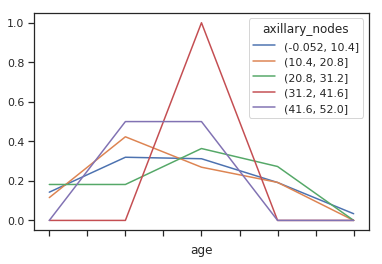

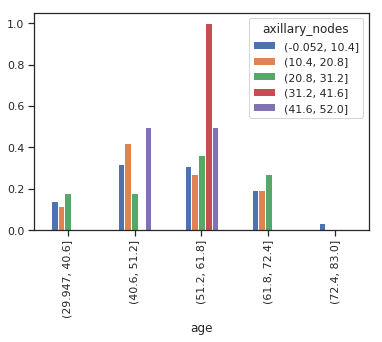

In [0]:
ct0 = pd.crosstab(age_bins, node_bins, normalize='columns')
ct0.plot();
ct0.plot(kind='bar');


In [0]:
# comparing age to nodes is very bell curve-esk. I think that one of the factors is already very bell-like

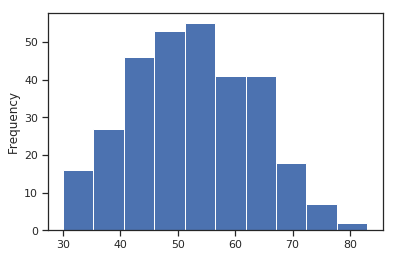

In [0]:
df['age'].plot.hist();

In [0]:
# Sure enough. Age is a total bell shape.

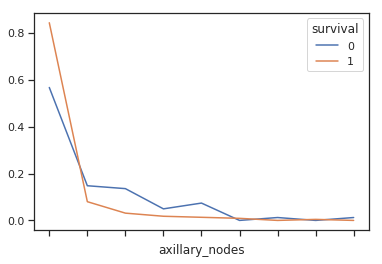

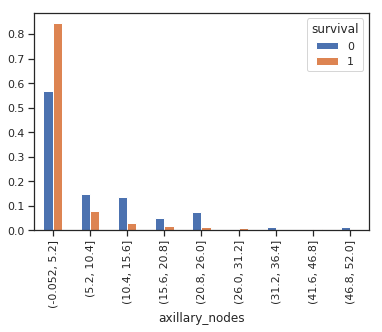

In [0]:
ct1 = pd.crosstab(node_bins, df['survival'], normalize='columns')
ct1.plot();
ct1.plot(kind='bar');

In [0]:
# Looking at nodes, it looks like the majority happen in the lower range.
# Also, I'm noticing that relationship to survival is opposite in the lower range. 

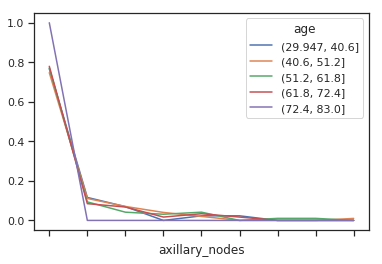

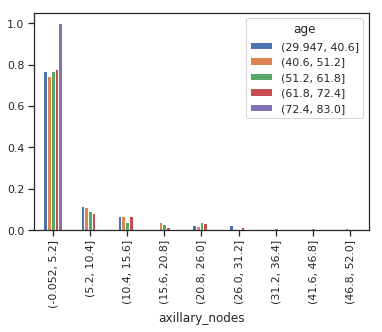

In [0]:
ct2 = pd.crosstab(node_bins, age_bins, normalize='columns')
ct2.plot();
ct2.plot(kind='bar');

In [0]:
# More of the same obfuscation. The above graphs are not telling me much. 

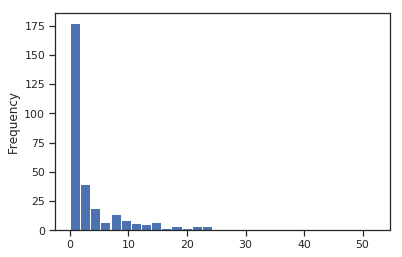

In [0]:
df['axillary_nodes'].plot.hist(bins=30);

In [0]:
# Susupiscious confirmed. There are simply way more cases of less nodes. 

In [0]:
# I'm going to slice off a chunk of data to only get the lower end of nodes...
# Hopefully this isn't corupting too much...



In [0]:
# Making a copy of the df where I chop the higher end of nodes off...

df3 = df[(df['axillary_nodes']>= 0) & (df['axillary_nodes'] <= 10)]

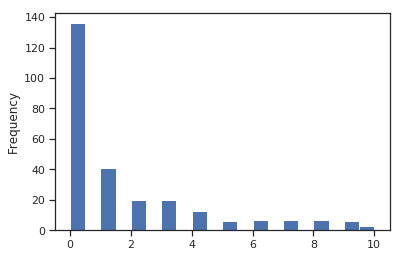

In [0]:
df3['axillary_nodes'].plot.hist(bins=20);

In [0]:
# It looks like cutting this feature back yeilds essentiall the same result in the shape of the distribution

In [0]:
# I'm starting to run out of time, but I want to go back and look at the crosstab 
# this time with the upper end chopped off of the nodes

#chopping the features into bins
age_bins3 = pd.cut(df3['age'], 5)
node_bins3 = pd.cut(df3['axillary_nodes'],5)
opyear_bins3 = pd.cut(df3['operation_year'],5)

ct7 = pd.crosstab(df3['surv_boolean'], node_bins, normalize='columns')
ct7

axillary_nodes,"(-0.052, 5.2]","(5.2, 10.4]"
surv_boolean,,
False,0.194915,0.4
True,0.805085,0.6


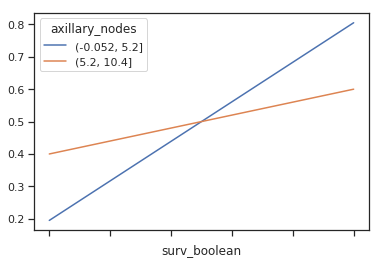

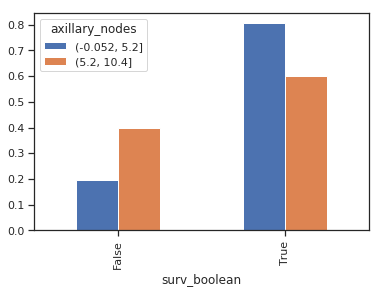

In [0]:
ct7.plot();
ct7.plot(kind='bar');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


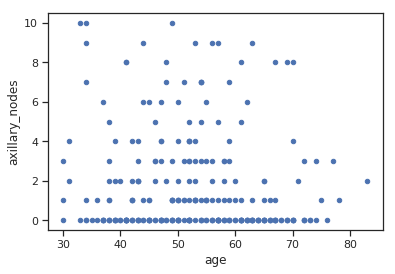

In [0]:
df3.plot.scatter('age', 'axillary_nodes');

In [0]:
pd.crosstab(node_bins3, age_bins3, normalize='columns')

age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
axillary_nodes,,,,,
"(-0.01, 2.0]",0.736842,0.729412,0.674699,0.862745,0.777778
"(2.0, 4.0]",0.105263,0.129412,0.168675,0.039216,0.222222
"(4.0, 6.0]",0.052632,0.058824,0.060241,0.019608,0.000000
"(6.0, 8.0]",0.026316,0.058824,0.060241,0.058824,0.000000
"(8.0, 10.0]",0.078947,0.023529,0.036145,0.019608,0.000000


In [0]:
# Making a copy of the df where I chop the higher end of age...

df4 = df[(df['age']>= 0) & (df['age'] <=50)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


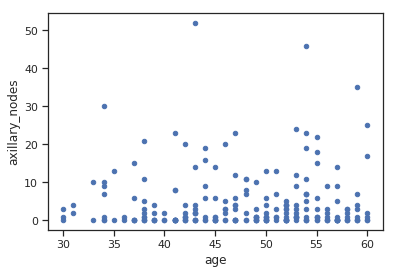

In [0]:
df4.plot.scatter('age', 'axillary_nodes');

In [0]:
age_bins = pd.cut(df['age'], 10)
node_bins = pd.cut(df['axillary_nodes'],10)
opyear_bins = pd.cut(df['operation_year'],5)

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

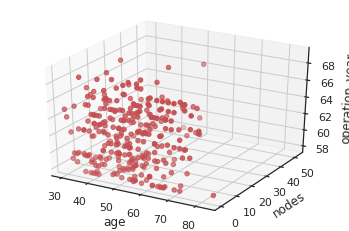

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['age']
y = df['axillary_nodes']
z = df['operation_year']



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('age')
ax.set_ylabel('nodes')
ax.set_zlabel('operation_year')

plt.show()

In [17]:
# I just lost 30 minutes because I forgot about this issue!

!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
df.dtypes


age               int64
operation_year    int64
axillary_nodes    int64
survival          int64
surv_boolean       bool
dtype: object

In [0]:
#df3 = df[(df['age']>= 0) & (df['age'] <= 50)]

In [0]:
# Making a copy of the df where I chop the higher end of nodes off...

df3 = df[(df['axillary_nodes']>= 0) & (df['axillary_nodes'] <= 10) & (df['age']>= 0) & (df['age'] <= 50)]


In [0]:
nods_8bins = pd.cut(df3['axillary_nodes'], 8)
age_8bins = pd.cut(df3['age'], 8)

# table of weights
ct1 = pd.crosstab(age_8bins, nods_8bins, values=df3['survival'], aggfunc='mean')
ct1

axillary_nodes,"(-0.01, 1.25]","(1.25, 2.5]","(2.5, 3.75]","(3.75, 5.0]","(5.0, 6.25]","(6.25, 7.5]","(7.5, 8.75]","(8.75, 10.0]"
age,,,,,,,,
"(29.98, 32.5]",1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
"(32.5, 35.0]",0.800000,NaN,NaN,NaN,NaN,1.0,NaN,0.666667
"(35.0, 37.5]",1.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN
"(37.5, 40.0]",0.909091,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
"(40.0, 42.5]",0.692308,1.000000,NaN,1.000000,NaN,NaN,1.0,NaN
"(42.5, 45.0]",0.714286,0.666667,1.000000,1.000000,0.0,NaN,NaN,0.000000
"(45.0, 47.5]",0.714286,0.000000,0.666667,0.666667,1.0,NaN,NaN,NaN
"(47.5, 50.0]",0.888889,1.000000,1.000000,1.000000,1.0,0.0,1.0,0.000000


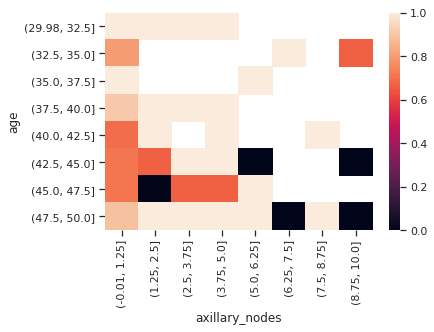

In [0]:
sns.heatmap(ct1)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

There are two main relationships that stand out as effecting survival rates: number of axillary nodes and age of the patient. 



## **Age and Survival**

In the below table note the relationship between survival and age. Age 30-40 years of age has a survival rate of about 90%, compared to an overall survival rate of about 74% (see above). Age 40 and older appear to hover around 70% survival rates. 

In [0]:
ct6 = pd.crosstab(df['surv_boolean'], age_bins, normalize='columns')
ct6

age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
surv_boolean,,,,,
False,0.093023,0.313131,0.28125,0.271186,0.333333
True,0.906977,0.686869,0.71875,0.728814,0.666667


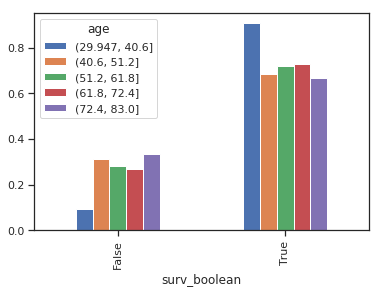

In [0]:

ct6.plot(kind='bar');

Again in the above bar graph, notice the Blue bar represents age 30-40, and has a much higher survival rate than other age groups.

## **Number of Nodes and Survival**

Below, the table shows the basic relationship between number of axillary nodes and survival. Note especially the lower two bins. Patients observed with 0-5 nodes had about an 80% survival rate, versus a 40% survival rate when observed in the 5-10 node range. 

In [0]:
pd.crosstab(df['surv_boolean'], node_bins, normalize='columns')

axillary_nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
surv_boolean,,,,,,,,,
False,0.194915,0.4,0.611111,0.5,0.666667,0.0,1.0,0.0,1.0
True,0.805085,0.6,0.388889,0.5,0.333333,1.0,0.0,1.0,0.0


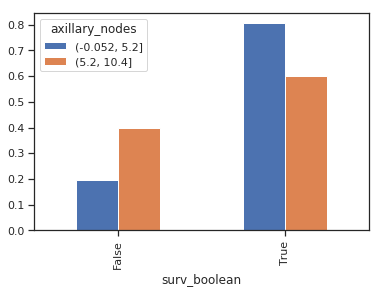

In [0]:
# Survival = True 
ct7.plot(kind='bar');

## **Age and Number of Axillary Nodes**

I've run out of time, without discovering a clear relationship between age and nodes. I see two possible scenerios arising if I had another hour on this: (1) The number of nodes decreases in frequency with age; (2) nodes increase in frequency with age. 

From the scatter plot below, I suspect that the frequency of higher node-counts goes up with age. If my suspcious is correct, then it would be dificult to determine whether age of a patient is the driving factor, or the number of nodes found.

I believe the findings of this study warrent further research. ;)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


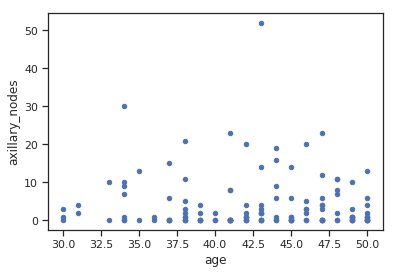

In [0]:
df4.plot.scatter('age', 'axillary_nodes');